In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


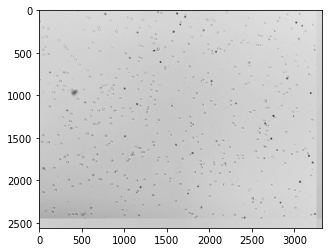

In [23]:
#load image
img = cv2.imread("/content/drive/MyDrive/a2780_7.png")
img_copy = img.copy()


#turn grayscale
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray_copy = gray_img.copy()


pad_X = 128 - img.shape[0] %128
pad_Y = 128 - img.shape[1] %128

#pad with median value to (2560, 3328)
padded_gray = np.pad(gray_img,[(0,pad_X), (0, pad_Y)], mode = 'median')

plt.imshow(padded_gray, cmap='gray')


# Yeni Bölüm

True

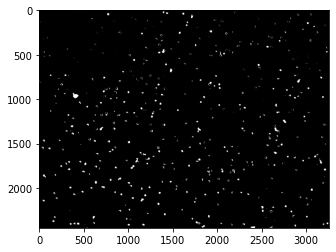

In [24]:
appended = np.zeros((img.shape[0] + pad_X, img.shape[1] + pad_Y), dtype= int)

size = 128

#Otsu each submatrix of size 128x128
for i in range(0,appended.shape[0], size):
  for j in range(0,appended.shape[1], size):
    sub = padded_gray[i: i+size, j : j+size]
    ret, thresh = cv2.threshold(sub,127,255,cv2.THRESH_BINARY_INV)
    kernel = np.ones((5,5),np.uint8)
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel,iterations = 3)
    appended[i: i+size, j : j+size] = closing


#trim the padding    
appended = appended[0:(appended.shape[0] - pad_X), 0:(appended.shape[1] - pad_Y)]

plt.imshow(appended,cmap = 'gray')
cv2.imwrite("/content/drive/MyDrive/Staj Çalışmaları/Melis/result.png",appended)

426


True

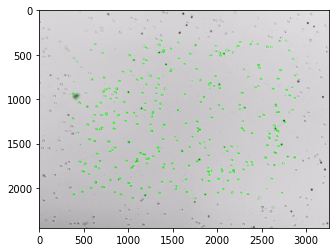

In [25]:
#get threshold image as .png
result = cv2.imread("/content/drive/MyDrive/Staj Çalışmaları/Melis/result.png")
result_gray = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)

#find contours
contours, hierarchy = cv2.findContours(result_gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_corrected = list()
#print(contours)

#extracting contours only at [324:2124, 382:2882]
for i in range(len(contours)):
  sum_x = 0
  sum_y = 0

  for point in contours[i]:
    # Merhaba Melis bu kısımda ufak bir hatan var. contour'ün ağırlık merkezini bul ve ağırlık merkezini kordinatlar ile karşılaştır. 
    #Kontürün ilk noktasını karşılaştırıyorsun. kontorün ilk noktasını değil bütün kontüre bakman lazım.
    sum_x += point[0][0]
    sum_y += point[0][1]
   
  
  center_x = sum_x / len(contours[i])
  center_y = sum_y / len(contours[i])       
  #print(center_x, center_y)             
  if (center_y >= 324 and center_y <=2124 and center_x <=2882 and center_x >= 382):
    contours_corrected.append(contours[i])
   
    
#number of contours
num_contours= len(contours_corrected)
print(num_contours)

#draw only to [324:2124, 382:2882]
cv2.drawContours(img_copy, contours_corrected, -1, (0, 255, 0), 3)
plt.imshow(img_copy)

cv2.imwrite("/content/drive/MyDrive/Staj Çalışmaları/Melis/countours.png",img_copy)

In [26]:
total_area = 0

#calculating areas of contours and storing them at an array
for i in range(num_contours):
  area = cv2.contourArea(contours_corrected[i])
  total_area += area 

#average cell area and diameter
ave_area = total_area / num_contours
ave_diameter = 2* np.sqrt(ave_area/np.pi)

print("Average diameter: ", "%1.3f" % ave_diameter)
print("Average area of cells: ", "%1.3f" % ave_area)

Average diameter:  13.124
Average area of cells:  135.275


In [27]:
def intensity_per_cell(contour, image):
  pixel_values = list()
  cell_rect = cv2.boundingRect(contour) #returns: 0 - x, 1 - y, 2 - w, 3 - h

  for i in range(cell_rect[2]):
    x = cell_rect[0] + i
    for j in range(cell_rect[3]):
      y = cell_rect[1] + j
      is_in_contour = cv2.pointPolygonTest(contour, (x,y), False)

      if is_in_contour>=0:
        pixel_values.append(image[y,x])
        
  return sum(pixel_values)/len(pixel_values)

True

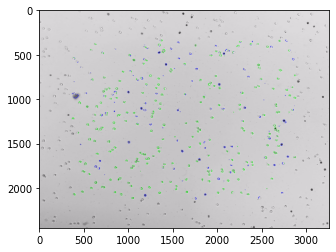

In [28]:
red_green = img.copy()

for c in contours_corrected:
    intensity = intensity_per_cell(c, gray_copy)
    

    if intensity < 125: #red
      cv2.drawContours(red_green, c, -1, (0, 0, 255), 3)

    else: #green
      cv2.drawContours(red_green, c, -1, (0, 255, 0), 3)


plt.imshow(red_green)
cv2.imwrite("/content/drive/MyDrive/Staj Çalışmaları/Melis/red_green.png",red_green)